# Toyota Corolla dataset

| FEATURE | DESCRIPTION |
|:-------|:-----------|
| Model |model of the car |
|Price|Offer Price in EUROs|	
|Age_08_04|Age in months as in August 2004|
|Mfg_Month|Manufacturing month (1-12)|	
|Mfg_Year |Manufacturing Year|
|KM|Accumulated Kilometers on odometer|
|Fuel_Type|Fuel Type (Petrol, Diesel, CNG)|
|HP|Horse Power|
|Met_Color|Metallic Color?  (Yes=1, No=0)|
|Color|Color (Blue, Red, Grey, Silver, Black, etc.)|
|Automatic|Automatic ( (Yes=1, No=0)|
|cc|Cylinder Volume in cubic centimeters|
|Doors|Number of doors|
|Cylinders|Number of cylinders|
|Gears|Number of gear positions|
|Quarterly_Tax|Quarterly road tax in EUROs|
|Weight|Weight in Kilograms|
|Mfr_Guarantee|Within Manufacturer's Guarantee period  (Yes=1, No=0)|
|BOVAG_Guarantee|BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)|
|Guarantee_Period|Guarantee period in months|
|ABS|Anti-Lock Brake System (Yes=1, No=0)|
|Airbag_1|Driver_Airbag  (Yes=1, No=0)|
|Airbag_2|Passenger Airbag  (Yes=1, No=0)|
|Airco|Airconditioning  (Yes=1, No=0)|
|Automatic_airco|Automatic Airconditioning  (Yes=1, No=0)|
|Boardcomputer|Boardcomputer  (Yes=1, No=0)|
|CD_Player|CD Player  (Yes=1, No=0)|
|Central_Lock|Central Lock  (Yes=1, No=0)|
|Powered_Windows|Powered Windows  (Yes=1, No=0)|
|Power_Steering|Power Steering  (Yes=1, No=0)|
|Radio|Radio  (Yes=1, No=0)|
|Mistlamps|Mistlamps  (Yes=1, No=0)|
|Sport_Model|Sport Model  (Yes=1, No=0)|
|Backseat_Divider|Backseat Divider  (Yes=1, No=0)|
|Metallic_Rim|Metallic Rim  (Yes=1, No=0)|
|Radio_cassette|Radio Cassette  (Yes=1, No=0)|
|Tow_Bar|Tow Bar  (Yes=1, No=0)|

<br>Consider only the below columns and prepare a prediction model for predicting Price.<br>
["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

In [1]:
# importing all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset and select relevant features
df = pd.read_csv('ToyotaCorolla.csv')
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
# Check for any duplicate rows and drop, if any
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(1435, 9)

In [6]:
# Checking for missing values
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

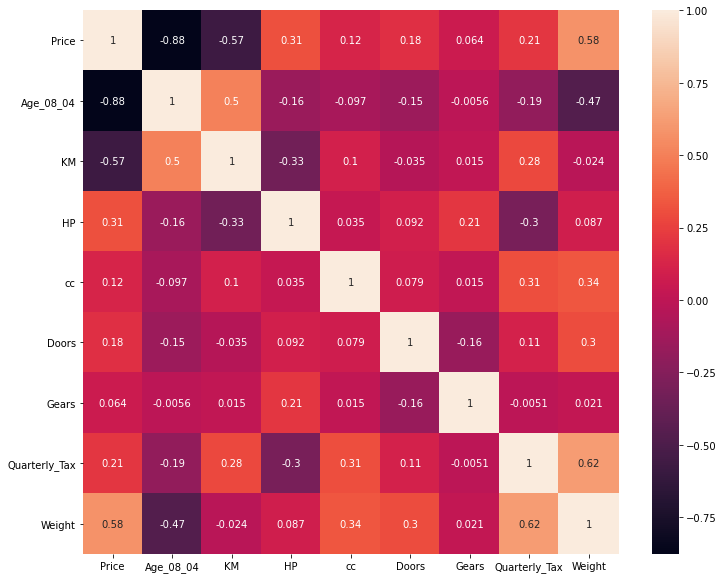

In [7]:
# Let's visualise linear correlation between the features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

# We observe Price feature shows strong negative linear correlation with Age, KM 
# and some positive linear correlation with weight, HP.

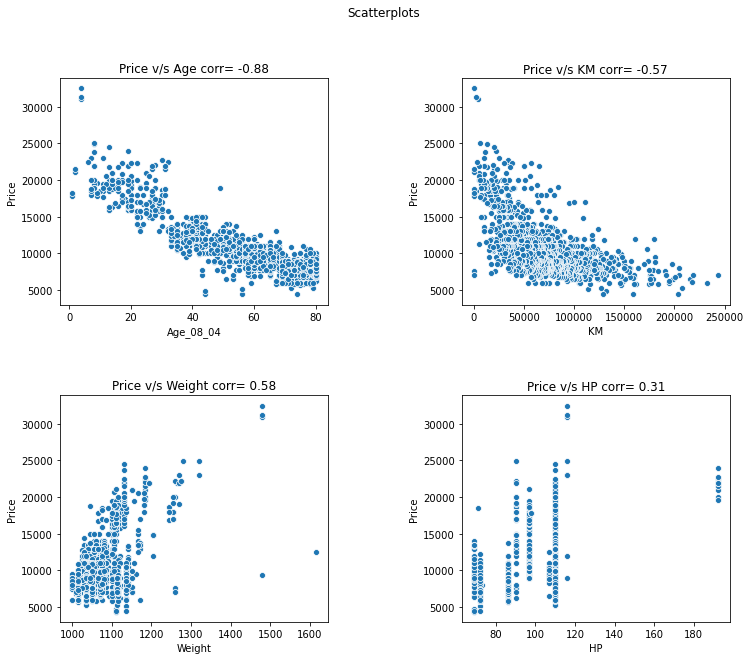

In [8]:
# Visualizing scatterplots of features which show linear correlation with label
# Create 4 subplots
fig,axes = plt.subplots(figsize=(12,10),nrows=2,ncols=2)

sns.scatterplot(x='Age_08_04', y='Price', data=df, ax=axes[0][0])
sns.scatterplot(x='KM', y='Price', data=df,ax=axes[0][1])
sns.scatterplot(x='Weight', y='Price', data=df, ax=axes[1][0])
sns.scatterplot(x='HP', y='Price', data=df,ax=axes[1][1])

fig.suptitle('Scatterplots')
fig.subplots_adjust(wspace=0.5, hspace= 0.4)
axes[0][0].set_title('Price v/s Age corr= -0.88')
axes[0][1].set_title('Price v/s KM corr= -0.57')
axes[1][0].set_title('Price v/s Weight corr= 0.58')
axes[1][1].set_title('Price v/s HP corr= 0.31')

plt.tight_layout;

In [9]:
# We observe some outliers which can distort our linear model generalization i.e degrade its predictive performance
# Removing outliers
index = df[df['Price']>30000].index.tolist()
index.append(df[(df['Weight']>1250) & (df['Price']<15000)].index.tolist())
index.append(df[(df['Age_08_04']<60) & (df['Age_08_04']>40) & (df['Price']<5500)].index.tolist())
index.append(df[(df['Age_08_04']<60) & (df['Age_08_04']>40) & (df['Price']>17000)].index.tolist())
index

[109, 110, 111, [221, 601, 654, 960], [191, 192, 393, 402], [523]]

In [10]:
from pandas.core.common import flatten
index= list(flatten(index))
index

[109, 110, 111, 221, 601, 654, 960, 191, 192, 393, 402, 523]

In [11]:
# Features and labels
X = df.drop(columns='Price')
y = df['Price']

In [12]:
# Train-test split (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.drop(index=index,errors='ignore')
X_train.shape

(1004, 8)

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)# Train, fit the model and make predictions
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [15]:
# Train, fit the model and make predictions
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
# Performance evaluation
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))

RMSE: 1360.2249412352894
MAE: 1000.7181310896707


In [17]:
y.mean()

10720.915679442509

# Thank you!